In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('spotify_data.csv')
df.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [4]:
df['mode'].unique()

array([1, 0], dtype=int64)

In [5]:
df = df.drop(["song_title","artist"], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
dtypes: float64(10), int64(5)
memory usage: 236.5 KB


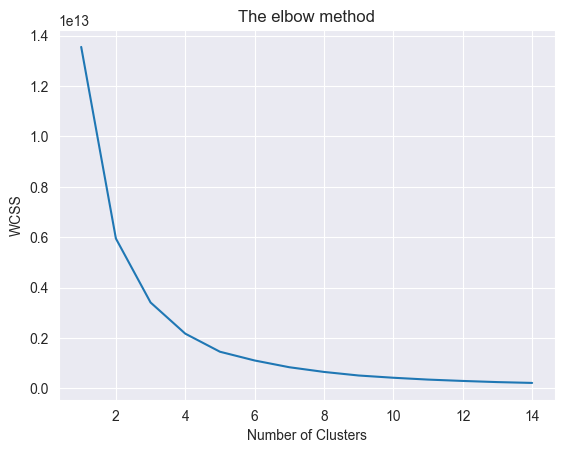

In [7]:
wcss = []

for i in range(1,15):
    Kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    Kmeans.fit(df)
    wcss.append(Kmeans.inertia_)

#Melakukan plot untuk hasil sehingga bisa melakukan observasi terhadap elbow
plt.plot(range(1,15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

In [8]:
# sns.pairplot(df, hue='mode')

<AxesSubplot: xlabel='Unnamed: 0', ylabel='duration_ms'>

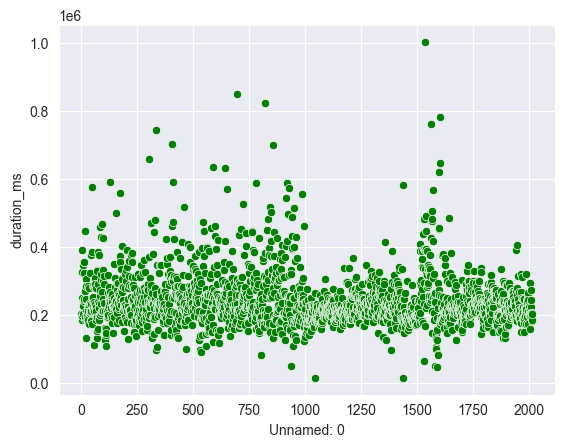

In [9]:
sns.scatterplot(data=df, x= "Unnamed: 0", y="duration_ms", c = ["green"])

In [10]:
x = df.iloc[:,:-1].values
y = df.iloc[:,:9].values

In [11]:
model = KMeans(n_clusters=5)
model.fit(x)
y_pred = model.predict(x)

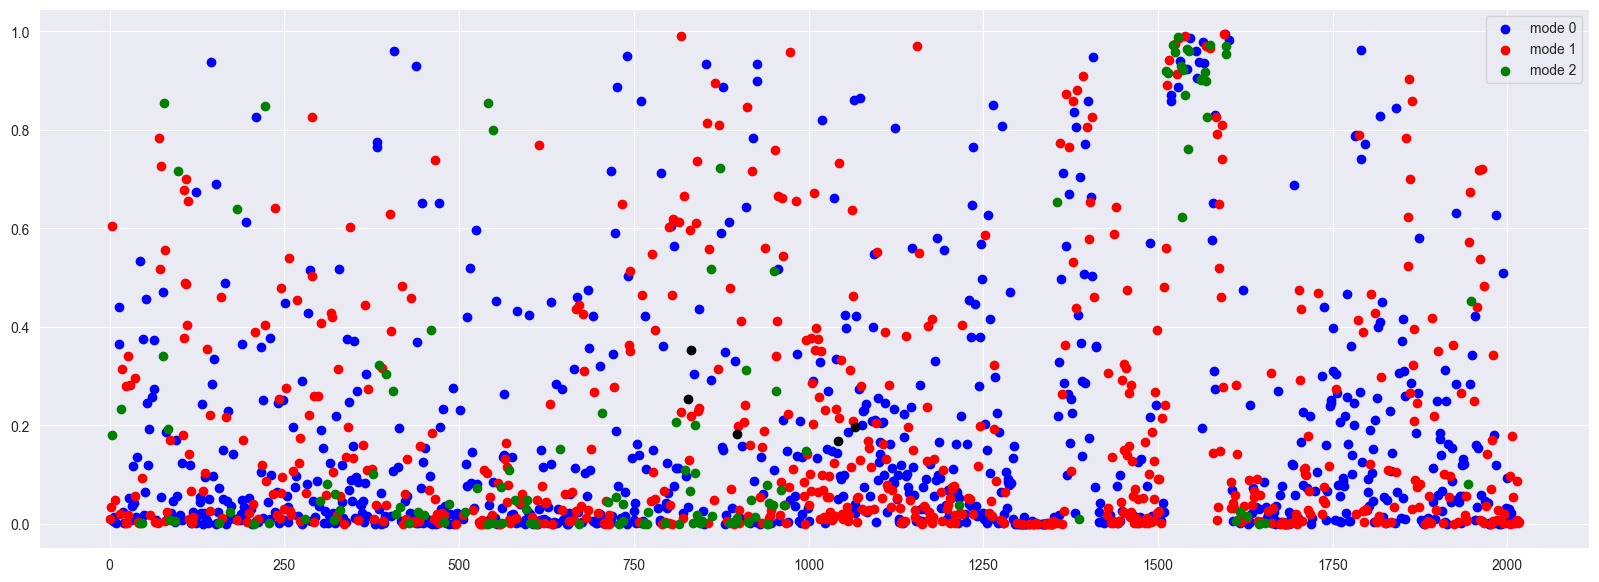

In [12]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0,1], color = 'blue', label = 'mode 0')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1,1], color = 'red', label = 'mode 1')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2,1], color = 'green', label = 'mode 2')
# plt.scatter(x[y_pred == 3, 0], x[y_pred == 3,1], color = 'yellow', label = 'mode 3')
# plt.scatter(x[y_pred == 4, 0], x[y_pred == 4,1], color = 'white', label = 'mode 4')

plt.scatter(x= model.cluster_centers_[:,0], y= model.cluster_centers_[:,1], color = 'brown', marker = '@', label = '')
plt.legend()
plt.show()


In [13]:
print(model.cluster_centers_)

[[ 1.04179907e+03  1.68649611e-01  6.15490128e-01  2.34930732e+05
   6.89704994e-01  8.41864928e-02  5.34610918e+00  1.89166318e-01
  -6.64229036e+00  6.24854820e-01  9.00020906e-02  1.21854675e+02
   3.97793264e+00  4.86259582e-01]
 [ 1.06640775e+03  1.96398028e-01  6.20175194e-01  1.80349462e+05
   7.05781705e-01  8.92426804e-02  5.11317829e+00  1.90197674e-01
  -6.45820310e+00  6.43410853e-01  1.01347132e-01  1.23130724e+02
   3.97054264e+00  5.45309767e-01]
 [ 8.27120968e+02  2.53300797e-01  6.57943548e-01  4.17840073e+05
   5.90810484e-01  4.26390304e-01  5.67741935e+00  1.64004032e-01
  -1.04763065e+01  5.32258065e-01  6.74709677e-02  1.17457419e+02
   3.96774194e+00  4.58454032e-01]
 [ 8.97839335e+02  1.82619190e-01  6.13991690e-01  3.02813075e+05
   6.56260388e-01  2.09869106e-01  5.68144044e+00  1.98268421e-01
  -7.82595568e+00  5.65096953e-01  9.42975069e-02  1.20681313e+02
   3.94459834e+00  4.52104432e-01]
 [ 8.31961538e+02  3.51931923e-01  5.45038462e-01  6.56582615e+05
  

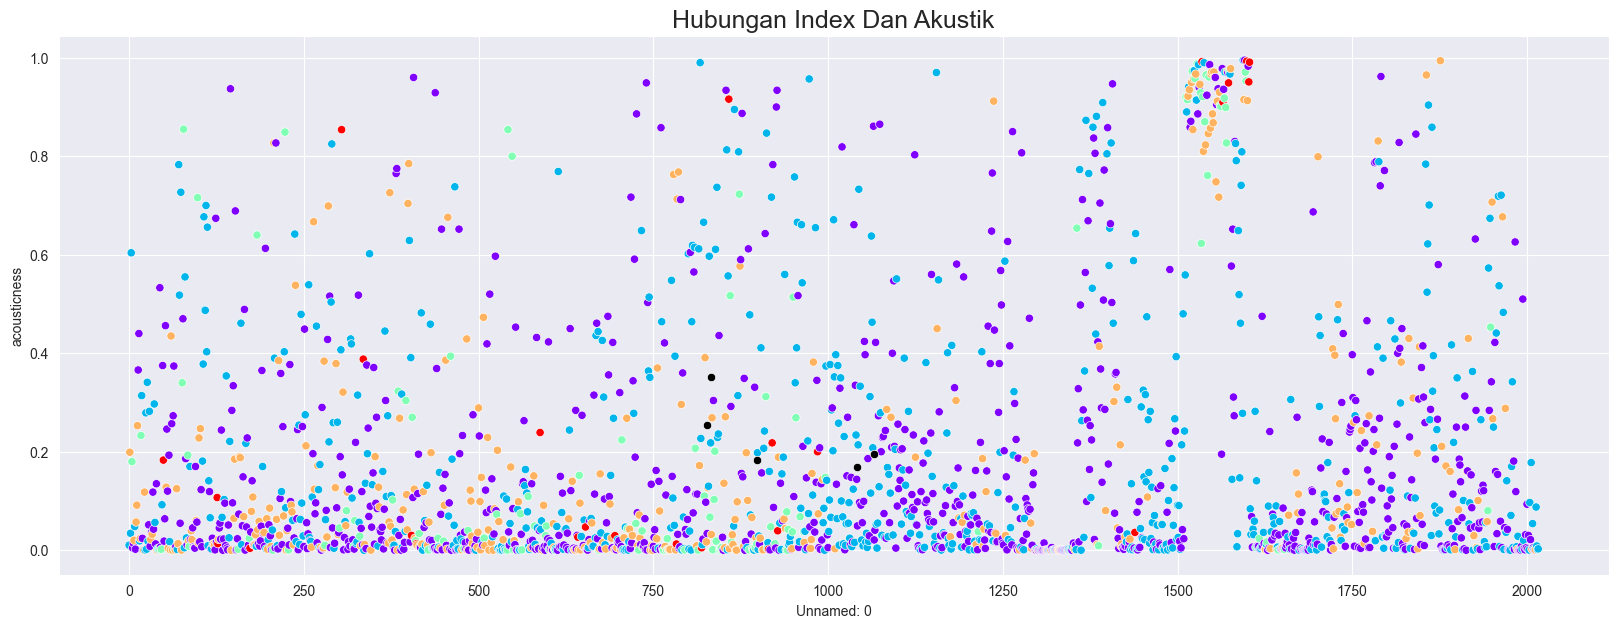

In [14]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.title("Hubungan index dan akustik".title(),fontsize=18)
sns.scatterplot(data=df, x='Unnamed: 0' , y='acousticness' , c = model.labels_, cmap='rainbow')
sns.scatterplot(x= model.cluster_centers_[:,0], y= model.cluster_centers_[:,1], c = ['black'])
plt.show()

## uji coba 3D

In [15]:
x= model.cluster_centers_[:,0]
y= model.cluster_centers_[:,1]
z= df['Unnamed: 0']

In [16]:
print(model.cluster_centers_[:,0])

[1041.79907085 1066.40775194  827.12096774  897.83933518  831.96153846]


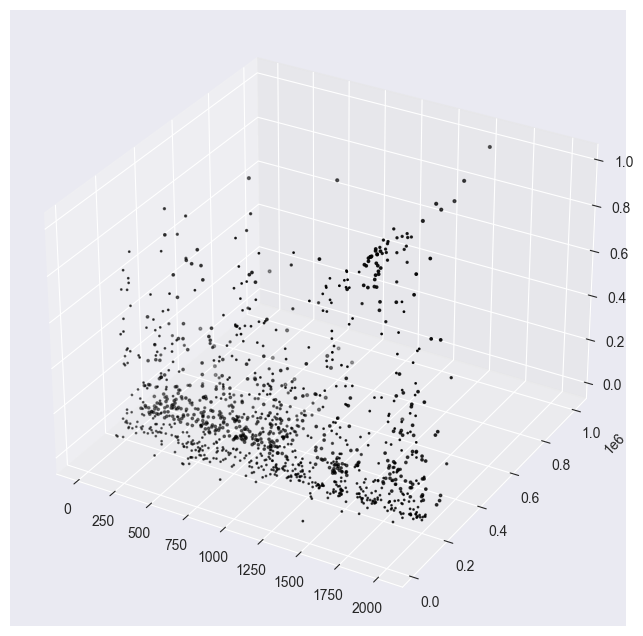

In [17]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection ='3d')
fg = ax.scatter3D(df['Unnamed: 0'],df['duration_ms'],df['acousticness'], s= model.labels_,  color='black')

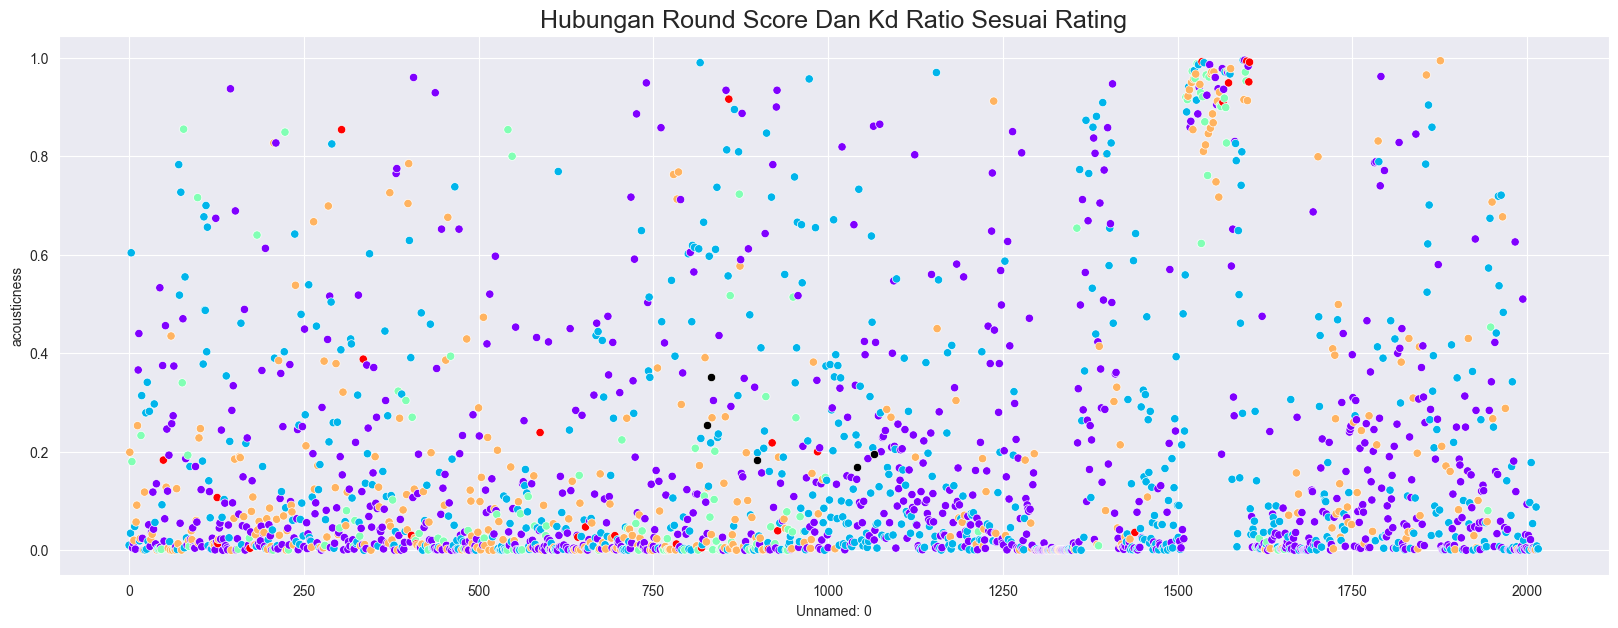

In [18]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.title("Hubungan Round score dan KD Ratio sesuai Rating".title(),fontsize=18)
sns.scatterplot(data=df, x='Unnamed: 0' , y='acousticness' , c = model.labels_, cmap='rainbow')
sns.scatterplot(x= model.cluster_centers_[:,0], y= model.cluster_centers_[:,1], c = ['black'])
plt.show()